In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

2024-08-18 23:54:26.755048: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 23:54:26.755111: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 23:54:26.756743: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df = pd.read_csv('/kaggle/input/bank-customer-churn-modeling/Churn_Modelling.csv')

In [3]:
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Data Preprocessing

In [4]:
df.shape

(10000, 14)

As we don't have the use of Rownumber CustomerId and Surname, we'r dropping them.

In [5]:
df.drop(['RowNumber','CustomerId','Surname'], axis ='columns', inplace=True)

In [6]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7097,754,Spain,Female,50,7,146777.44,2,0,1,150685.52,0
6976,701,Spain,Female,39,9,0.00,2,1,1,110043.88,0
9189,607,Germany,Male,32,9,144272.07,2,1,0,176580.63,0
3810,477,France,Female,30,6,131286.46,1,1,0,194144.45,0
3656,750,France,Female,37,6,0.00,1,1,1,117948.00,1


In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

We have two categorical columns: Geography and Gender. We'll apply one-hot encoding to Geography and simple mapping (No -> 0, Yes -> 1) to Gender to convert them into numerical representations.

In [8]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})

**ONE HOT ENCODING**

In [9]:
temp_col = pd.get_dummies(df['Geography'])
temp_col = temp_col.astype(int)
df = pd.concat([df, temp_col], axis=1)
df.drop('Geography', axis=1, inplace=True)

In [10]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
6021,714,1,52,4,100755.66,1,1,1,186775.25,0,1,0,0
512,735,1,34,5,0.00,2,0,0,71095.41,0,0,0,1
5028,478,0,38,4,171913.87,1,1,0,51820.87,1,1,0,0
6238,466,1,26,3,156815.71,1,1,1,137476.09,0,1,0,0
4057,510,0,26,6,136214.08,1,0,0,159742.33,0,1,0,0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


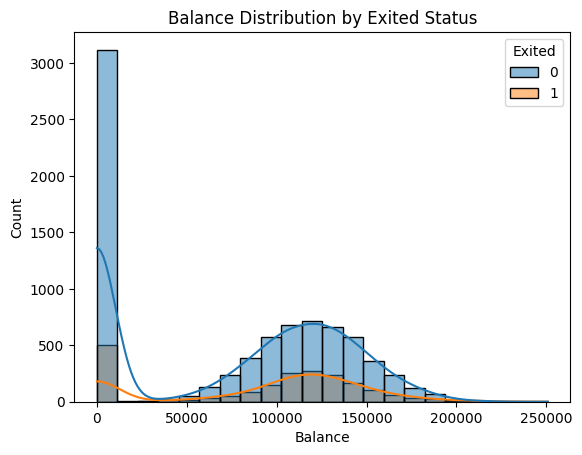

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

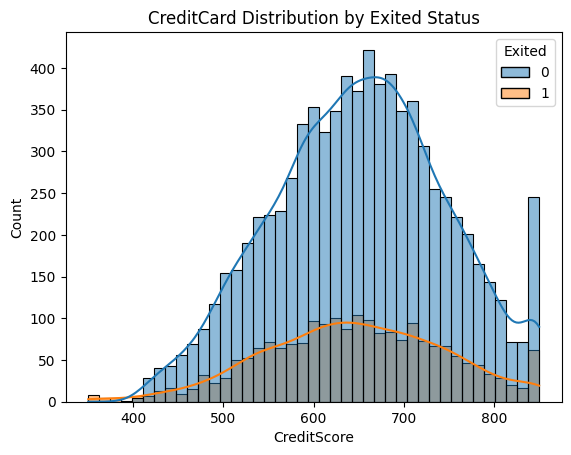

In [11]:
import seaborn as sns

sns.histplot(data=df, x='Balance', hue='Exited', kde=True)
plt.title('Balance Distribution by Exited Status')
plt.show()

sns.histplot(data=df, x='CreditScore', hue='Exited', kde=True)
plt.title('CreditCard Distribution by Exited Status')
plt.show()

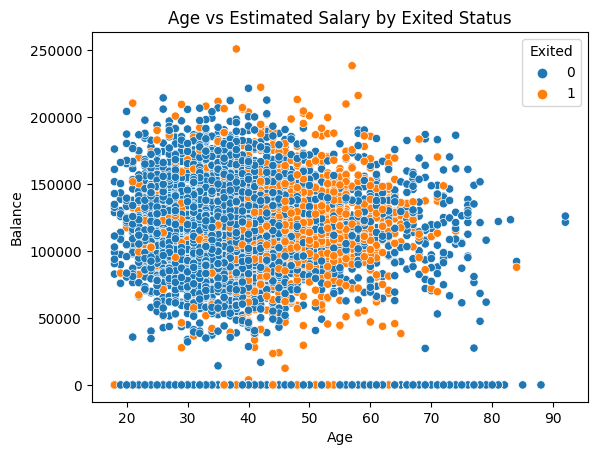

In [12]:
sns.scatterplot(data=df, x='Age', y='Balance', hue='Exited')
plt.title('Age vs Estimated Salary by Exited Status')
plt.show()

Shows us that between Age 40 to 70 irrespective of the balance people exited

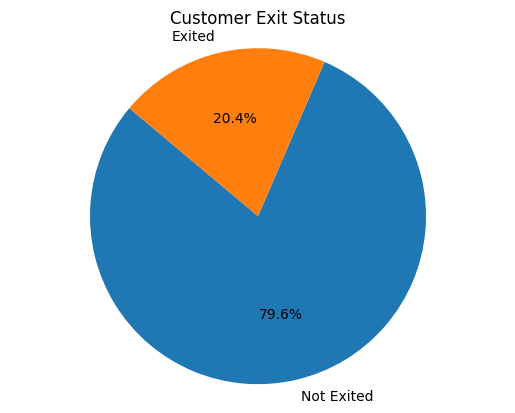

In [13]:
exit_counts = df['Exited'].value_counts()
labels = ['Not Exited', 'Exited']

plt.pie(exit_counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Customer Exit Status')
plt.axis('equal')

plt.show()

Hence we can say that we have imbalanced data sheet.

# Scaling

In [14]:
df.nunique()

CreditScore         460
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
France                2
Germany               2
Spain                 2
dtype: int64

Let's scale CreditScore, Age, Tenure, and EstimatedSalary using MinMaxScaler. This will transform each feature's values to lie within the range of 0 to 1.

In [15]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['CreditScore', 'Balance', 'EstimatedSalary','Age','NumOfProducts']
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

We can just divide Tenure by 10 to scale it.

In [16]:
df["Tenure"]=df["Tenure"]/10.0

In [17]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
3220,0.452,1,0.162162,0.7,0.526805,0.333333,0,0,0.468822,0,0,1,0
4147,0.798,1,0.648649,0.6,0.727515,0.333333,1,1,0.977185,0,0,1,0
7747,1.000,0,0.081081,0.6,0.000000,0.333333,1,1,0.065748,0,1,0,0
231,0.520,1,0.297297,0.0,0.000000,0.333333,1,0,0.311135,0,1,0,0
9060,0.670,0,0.202703,0.1,0.000000,0.666667,0,1,0.351081,1,1,0,0


So we have succefully processed our data from removing features to scaling them let's build the model now

# Model Building

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop('Exited',axis='columns')
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [19]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
7751,0.800,0,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,1,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,0,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,0,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,1,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,0,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,0,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,0,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,1,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,1,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [20]:
X_train.shape

(8000, 12)

We're using 2 hidden layer with activation function relu and one input and output layer with sigmoid function as it is binary classification problem. We're also using a dropout layer to manage overfitting.

In [24]:
from sklearn.metrics import confusion_matrix , classification_report
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(10, input_dim=12, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(8, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

Without Balancing

In [25]:
ANN(X_train, y_train , X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7171 - loss: 0.5994
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7976 - loss: 0.4906
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.4825
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8040 - loss: 0.4627
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7967 - loss: 0.4690
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8065 - loss: 0.4575
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8073 - loss: 0.4545
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8151 - loss: 0.4408
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8160 - loss: 0.4446
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8142 - loss: 0.4339
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8028 - loss: 0.4460
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

# With SMOTE

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_s, y_s = smote.fit_resample(X_train,y_train)

In [27]:
y_s.value_counts()

Exited
0    6368
1    6368
Name: count, dtype: int64

In [28]:
ANN(X_s, y_s , X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5092 - loss: 0.6923
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5907 - loss: 0.6645
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6326 - loss: 0.6477
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6514 - loss: 0.6316
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6527 - loss: 0.6242
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6722 - loss: 0.6074
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6894 - loss: 0.5872
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6983 - loss: 0.5789
Epoch 9/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7206 - loss: 0.5574
Epoch 10/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7159 - loss: 0.5575
Epoch 11/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7260 - loss: 0.5439
Epoch 12/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

# With SMOTE + RandomUnderSampling

In [29]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline 

over = SMOTE(sampling_strategy=0.66, k_neighbors=5)
under = RandomUnderSampler(sampling_strategy=0.66) 

steps = [('u', over), ('o', under)]
pipeline = Pipeline(steps=steps)

X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [30]:
y_resampled.value_counts()

Exited
0    6366
1    4202
Name: count, dtype: int64

In [31]:
ANN(X_resampled, y_resampled , X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6061 - loss: 0.6655
Epoch 2/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6638 - loss: 0.6233
Epoch 3/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6730 - loss: 0.6124
Epoch 4/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6836 - loss: 0.6010
Epoch 5/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6939 - loss: 0.5884
Epoch 6/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7095 - loss: 0.5709
Epoch 7/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7135 - loss: 0.5623
Epoch 8/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7120 - loss: 0.5622
Epoch 9/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7231 - loss: 0.5496
Epoch 10/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7284 - loss: 0.5418
Epoch 11/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7276 - loss: 0.5442
Epoch 12/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

# Conclusion

Without balancing, the model achieved high accuracy (84%), but F1-score was compromised at 48%. SMOTE improved F1-score to 54%, but precision hence overall accuracy dropped to 73%. The combination of SMOTE and undersampling yielded the best balance, achieving 82% accuracy and a 60% F1-score.